<a href="https://colab.research.google.com/github/jmichaelh/Intro-to-AI-with-Python/blob/main/Day_4/Final%20Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to AI Final Lab

We've covered many new subjects in this course. Now it's time to put your knowlege to the test. We'll be using a sample of a credit card transaction dataset from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)

You are tasked with **classifying** transactions as fraudulent or not. Use multiple machine learning methods introduced in the course. Start with a Logistic Regression and then try to improve it by clustering your feature data and adding the cluster labels as a feature themself. Compare results and report which model is your best estimator.


Using `creditcard_transactions.csv` provided in the data folder, do the following:
> 1. Install & import all necessary tools into your notebook
> 1. Read in your dataset
> 1. Get an understanding of the distribution of each column (5 number summaries i.e. "describe" it!)
> 1. Visualize your data
> 1. Create a correlation matrix and write down any features that look like they could be correlated
> 1. Define your features, X, and your target, y
> 1. Split your data into a training set and a testing set
> 1. Build a logistic regression model
> 1. Evaluate your model's performance
> 1. Now, using k-means cluster your features and add the cluster labels to X as an additional feature
> 1. Re-run logistic regression with the new feature and see if your results improved in the evaluation step

**Bonus:** try either of the other 2 classifiers we showed in class, Neural Networks or KNN. If you're feeling especially bold feel free to try a new classifier, [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


#### Install & import all necessary tools into your notebook

In [4]:
!pip install seaborn


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

#### Read in your dataset

In [13]:
ccData = pd.read_csv("creditcard_transactions.csv", index_col=0)
ccData.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Get an understanding of the distribution of each column (5 number summaries i.e. "describe" it!)

In [14]:
ccData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
count,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,...,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000
mean,12686.065095,-0.642974,0.569495,0.220561,0.631690,-0.320710,0.004687,-0.551137,-0.011555,0.512263,...,0.013627,-0.138176,-0.033452,0.011604,0.083246,0.102048,0.018572,0.008176,68.455297,0.089585
std,26055.489495,2.807890,2.016750,3.270259,2.006389,2.150015,1.429123,2.843758,2.365765,1.634945,...,1.464453,0.751843,0.662545,0.588650,0.468719,0.555655,0.566756,0.301519,192.160290,0.285599
min,0.000000,-30.552380,-34.607649,-31.103685,-4.657545,-32.092129,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2280.000000,-1.164620,-0.175690,0.194241,-0.511860,-0.720381,-0.706386,-0.631822,-0.191531,-0.152404,...,-0.264606,-0.547976,-0.183158,-0.339867,-0.170201,-0.321932,-0.083672,-0.017776,4.950000,0.000000
50%,5528.000000,-0.421759,0.360489,0.844430,0.331800,-0.185615,-0.199620,-0.110602,0.027313,0.697720,...,-0.107382,-0.125568,-0.046748,0.070986,0.119095,0.039410,0.001571,0.017469,15.950000,0.000000
75%,11052.000000,1.134803,1.045182,1.534593,1.352856,0.366833,0.454733,0.442239,0.334719,1.452414,...,0.075357,0.265470,0.088654,0.404543,0.362891,0.462468,0.159762,0.091507,53.927500,0.000000
max,170348.000000,2.132386,22.057729,4.101716,12.114672,34.099309,21.393069,34.303177,20.007208,10.392889,...,27.202839,8.361985,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


#### Visualize your data

<Axes: xlabel='Amount', ylabel='is_fraud'>

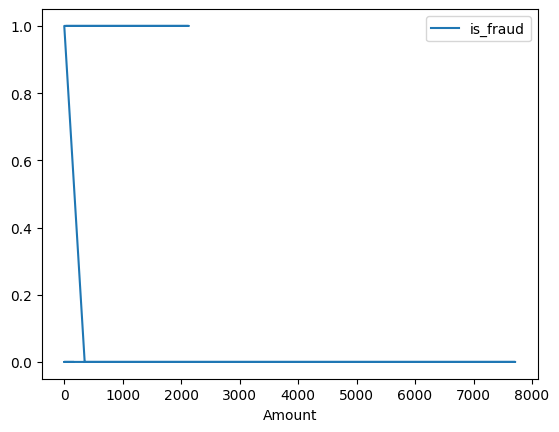

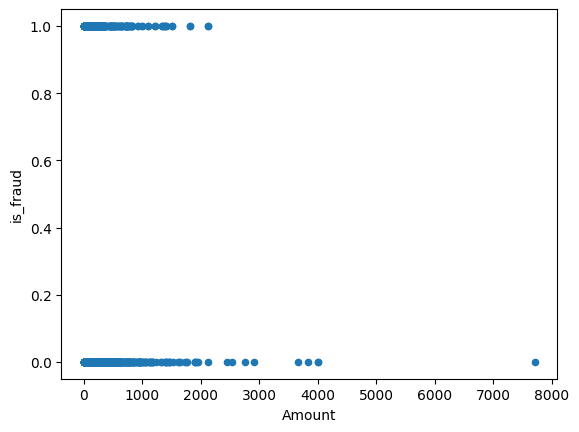

In [21]:
# To plot 'is_fraud' against 'Amount':
ccData.plot(x='Amount', y='is_fraud')
ccData.plot.scatter(x='Amount', y='is_fraud')

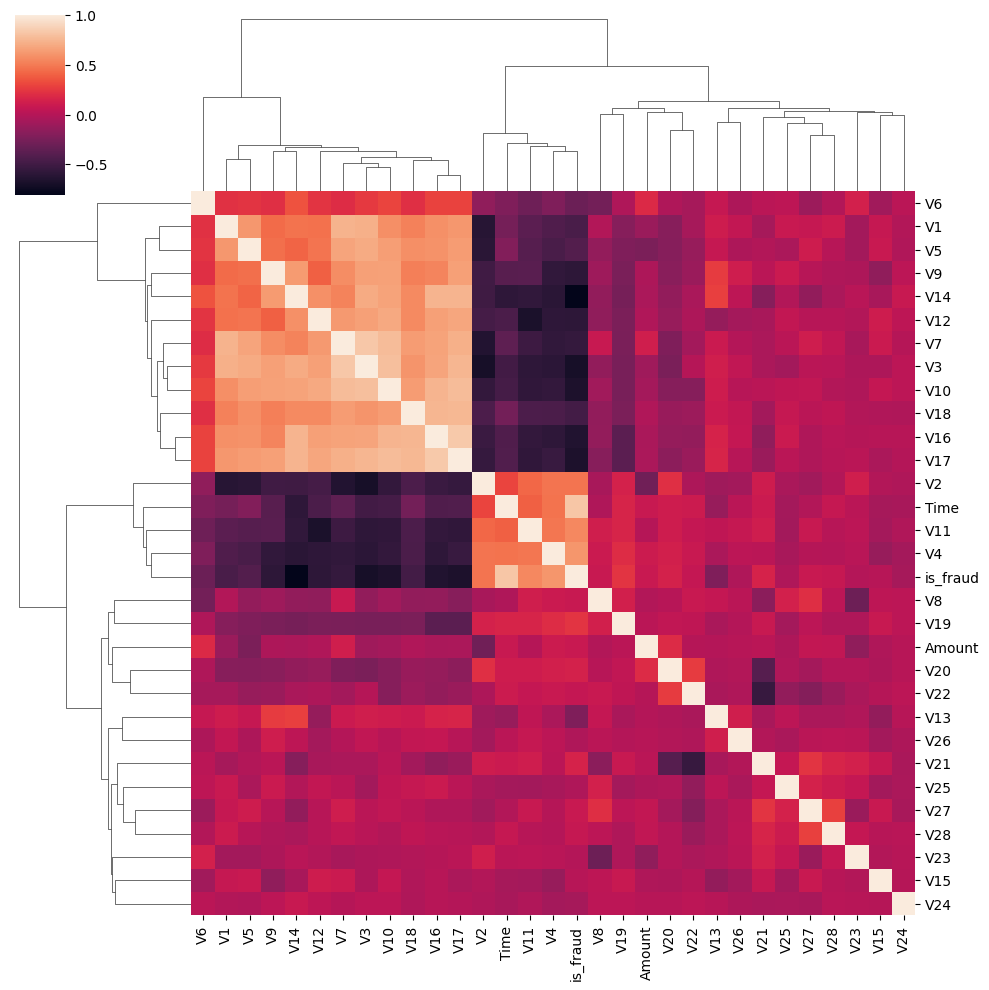

In [22]:
sns.clustermap(ccData.corr());

#### Create a correlation matrix and write down any features that look like they could be correlated

In [24]:
ccData.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,is_fraud
Time,1.000000,-0.269913,0.298708,-0.491040,0.468557,-0.209903,-0.224004,-0.363647,-0.024131,-0.394618,...,0.090643,0.096755,0.023706,-0.056840,-0.072360,0.020303,-0.013684,0.068691,0.080381,0.819435
V1,-0.269913,1.000000,-0.623176,0.721172,-0.432897,0.617863,0.219817,0.737182,-0.014576,0.438761,...,-0.059571,-0.060570,-0.074691,-0.015410,0.083976,0.060936,0.073549,0.099436,-0.110938,-0.461296
V2,0.298708,-0.623176,1.000000,-0.699195,0.473573,-0.605599,-0.156243,-0.639041,-0.056215,-0.500472,...,0.108016,-0.035101,0.117998,-0.028179,-0.047784,-0.075586,-0.084233,-0.009656,-0.289662,0.475088
V3,-0.491040,0.721172,-0.699195,1.000000,-0.597985,0.702572,0.256982,0.824878,-0.145314,0.648691,...,-0.042123,-0.001680,-0.031302,0.031096,-0.078077,0.053205,0.018750,0.017597,-0.088825,-0.695830
V4,0.468557,-0.432897,0.473573,-0.597985,1.000000,-0.455742,-0.228206,-0.568742,0.092939,-0.569015,...,0.019505,0.089114,0.014749,-0.067359,-0.055862,0.027855,0.002782,-0.005425,0.097139,0.611388
V5,-0.209903,0.617863,-0.605599,0.702572,-0.455742,1.000000,0.233793,0.672550,-0.138702,0.452549,...,-0.013420,-0.123947,-0.075375,-0.022084,-0.041993,-0.032895,0.109989,0.009270,-0.237804,-0.412992
V6,-0.224004,0.219817,-0.156243,0.256982,-0.228206,0.233793,1.000000,0.199203,-0.274180,0.215059,...,0.022749,-0.063956,0.132098,0.024251,0.039428,-0.033728,-0.107868,-0.009769,0.181685,-0.307841
V7,-0.363647,0.737182,-0.639041,0.824878,-0.568742,0.672550,0.199203,1.000000,0.076819,0.572181,...,-0.041283,-0.079783,-0.057447,-0.001818,0.022963,-0.004027,0.111347,0.049585,0.117767,-0.553503
V8,-0.024131,-0.014576,-0.056215,-0.145314,0.092939,-0.138702,-0.274180,0.076819,1.000000,-0.096812,...,-0.173790,0.089097,-0.300981,0.030015,0.131589,0.024560,0.204643,0.027282,-0.015778,0.077199
V9,-0.394618,0.438761,-0.500472,0.648691,-0.569015,0.452549,0.215059,0.572181,-0.096812,1.000000,...,0.024678,-0.114203,-0.033860,0.026900,0.094231,0.111844,0.009434,-0.024223,-0.034053,-0.593538


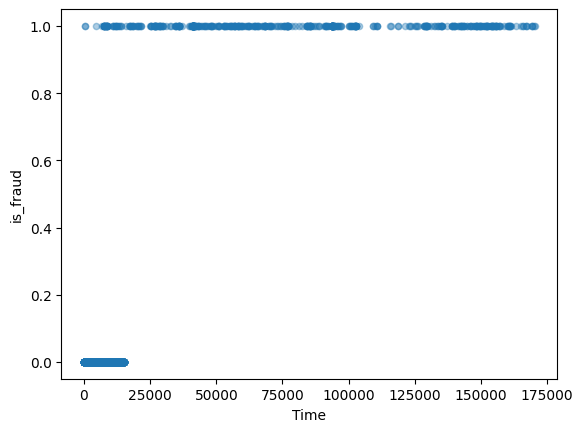

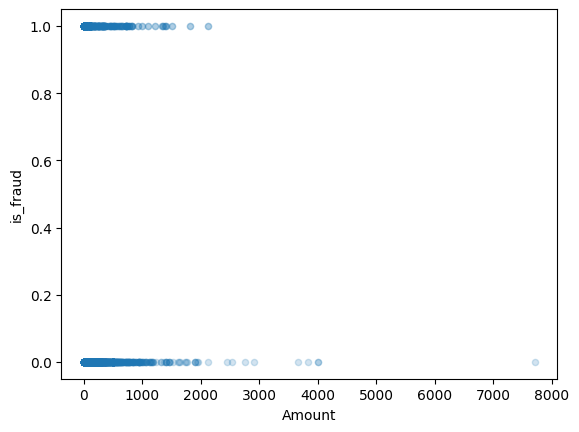

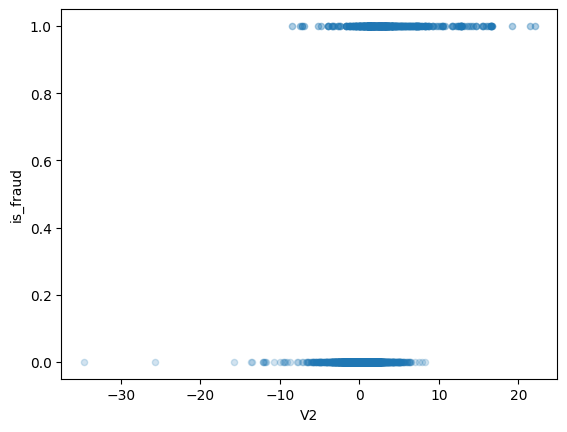

In [35]:
ccData.plot(kind='scatter', x='Time', y='is_fraud', alpha=0.2);
ccData.plot(kind='scatter', x='Amount', y='is_fraud', alpha=0.2);
ccData.plot(kind='scatter', x='V2', y='is_fraud', alpha=0.2);

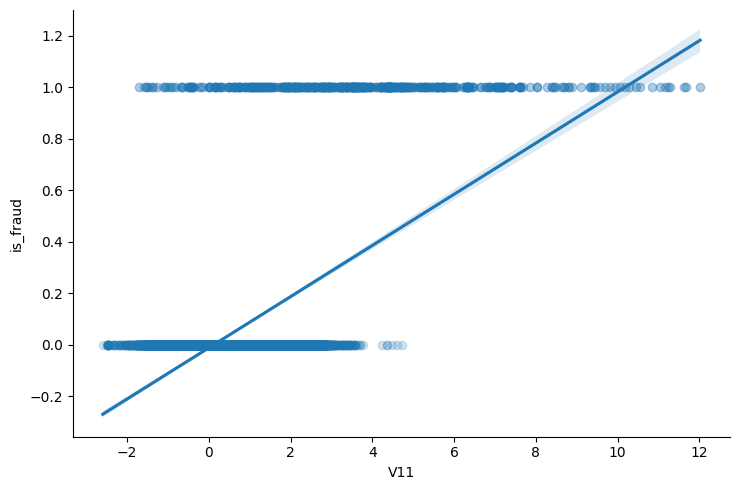

In [38]:
sns.lmplot(x='V11', y='is_fraud', data=ccData, aspect=1.5, scatter_kws={'alpha':0.2});


#### Define your features, X, and your target, y

In [39]:
# @title Default title text
feature_cols = ['V2', 'V11', 'V4', 'Time', 'Amount']
X = ccData[feature_cols]
y = ccData.is_fraud

#### Split your data into a training set and a testing set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Build a logistic regression model

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

-0.06132825370800829
[2.36952551e-02 2.82447042e-02 2.20702966e-02 6.89840454e-06
 1.04922999e-04]


#### Evaluate your model's performance

In [57]:
dict(zip(lr.coef_, feature_cols))

{0.02369525514337153: 'V2',
 0.028244704208467555: 'V11',
 0.02207029658676595: 'V4',
 6.898404542710068e-06: 'Time',
 0.00010492299868877431: 'Amount'}

In [67]:
predict_data = np.array([0, 0, 0, 0, 0]).reshape(-1, 1)
lr.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

In [63]:
example_data = np.array([0, 0, 0, 0, 0]).reshape(1, -1)  # Reshape to a single sample with 5 features
lr.predict(example_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06132825])

#### Now, using k-means cluster your features and add the cluster labels to X as an additional feature

#### Re-run logistic regression with the new feature and see if your results improved in the evaluation step

**Bonus:** try either of the other 2 classifiers we showed in class, Neural Networks or KNN. If you're feeling especially bold feel free to try a new classifier, [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)